In [157]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
plt.style.use("ggplot")

In [158]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [159]:
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

In [160]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [161]:
print(f"Train X shape: {train_X.shape}" )
print(f"Train y shape: {train_y.shape}" )
print(f"Test X shape: {test_X.shape}" )
print(f"Test y shape: {test_y.shape}" )

Train X shape: (60000, 28, 28)
Train y shape: (60000, 10)
Test X shape: (10000, 28, 28)
Test y shape: (10000, 10)


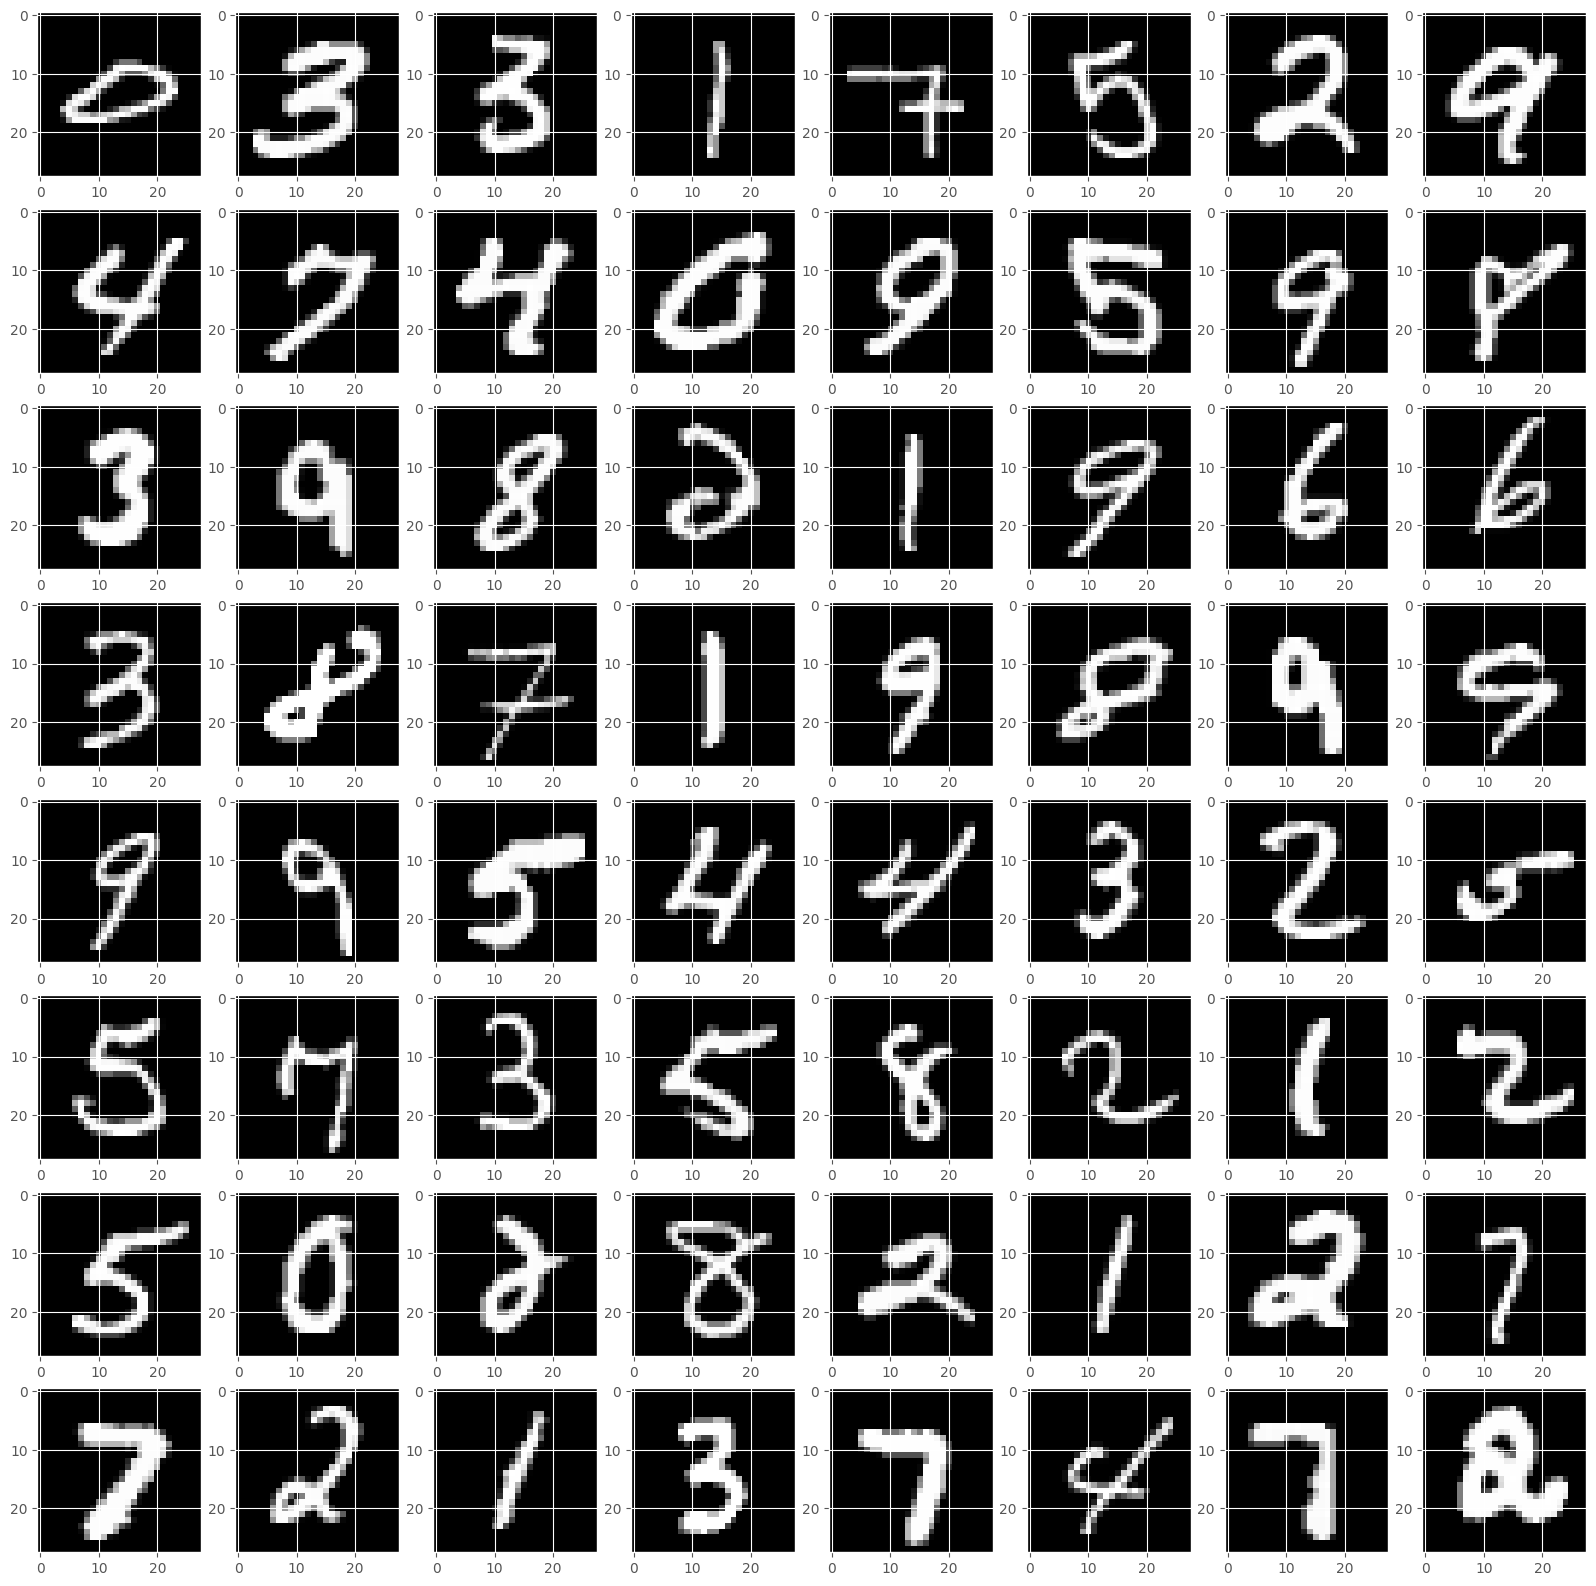

In [78]:
fig, ax = plt.subplots(8, 8, figsize=(20, 20))

for i in range(8):
  for j in range(8):
    random_index = random.randint(0, 59999)
    sample = train_X[random_index]
    ax[i][j].imshow(sample, cmap="gray")

In [ ]:
dig_recog_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [164]:
dig_recog_model.compile(
    loss="categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)

In [165]:
history = dig_recog_model.fit(train_X, train_y, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8802 - loss: 0.4078
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9678 - loss: 0.1063
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9777 - loss: 0.0731
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9839 - loss: 0.0509
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0423
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9900 - loss: 0.0317
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0261
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9929 - loss: 0.0213
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9947 - loss: 0.0169
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9947 - loss: 0.0152
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 12/20
1875/1875 ━━━━━━

In [166]:
test_loss, test_acc = dig_recog_model.evaluate(test_X, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.1761


Text(0, 0.5, 'loss')

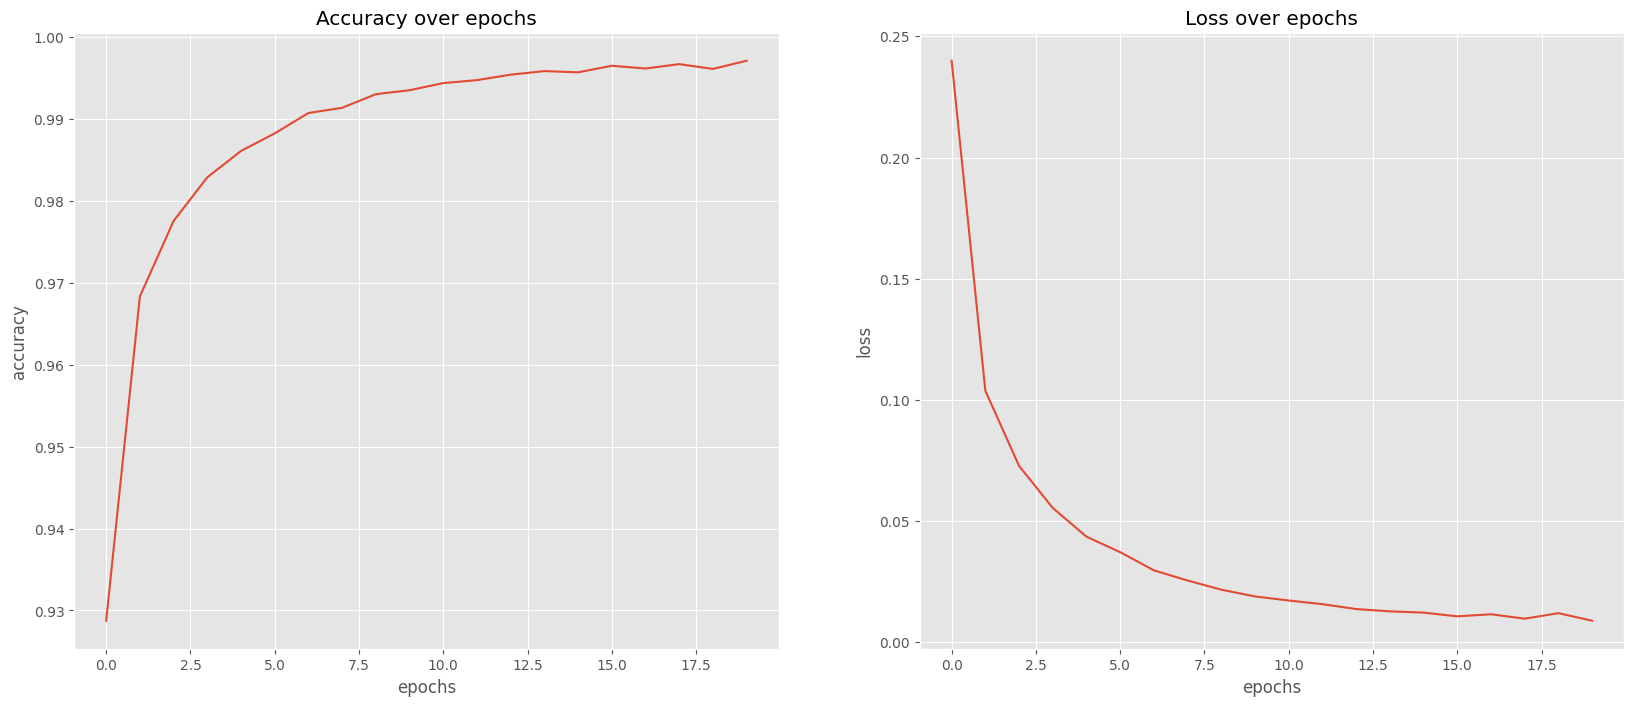

In [167]:
fig,ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(np.arange(20), history.history["accuracy"])
ax[0].set_title("Accuracy over epochs")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("accuracy")
ax[1].plot(np.arange(20), history.history["loss"])
ax[1].set_title("Loss over epochs")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("loss")

In [168]:
pred = dig_recog_model.predict(test_X)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [171]:
def reverse_onehot(value):
  for i in range(10):
    if value[i] == 1:
      return i

In [174]:
pred[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

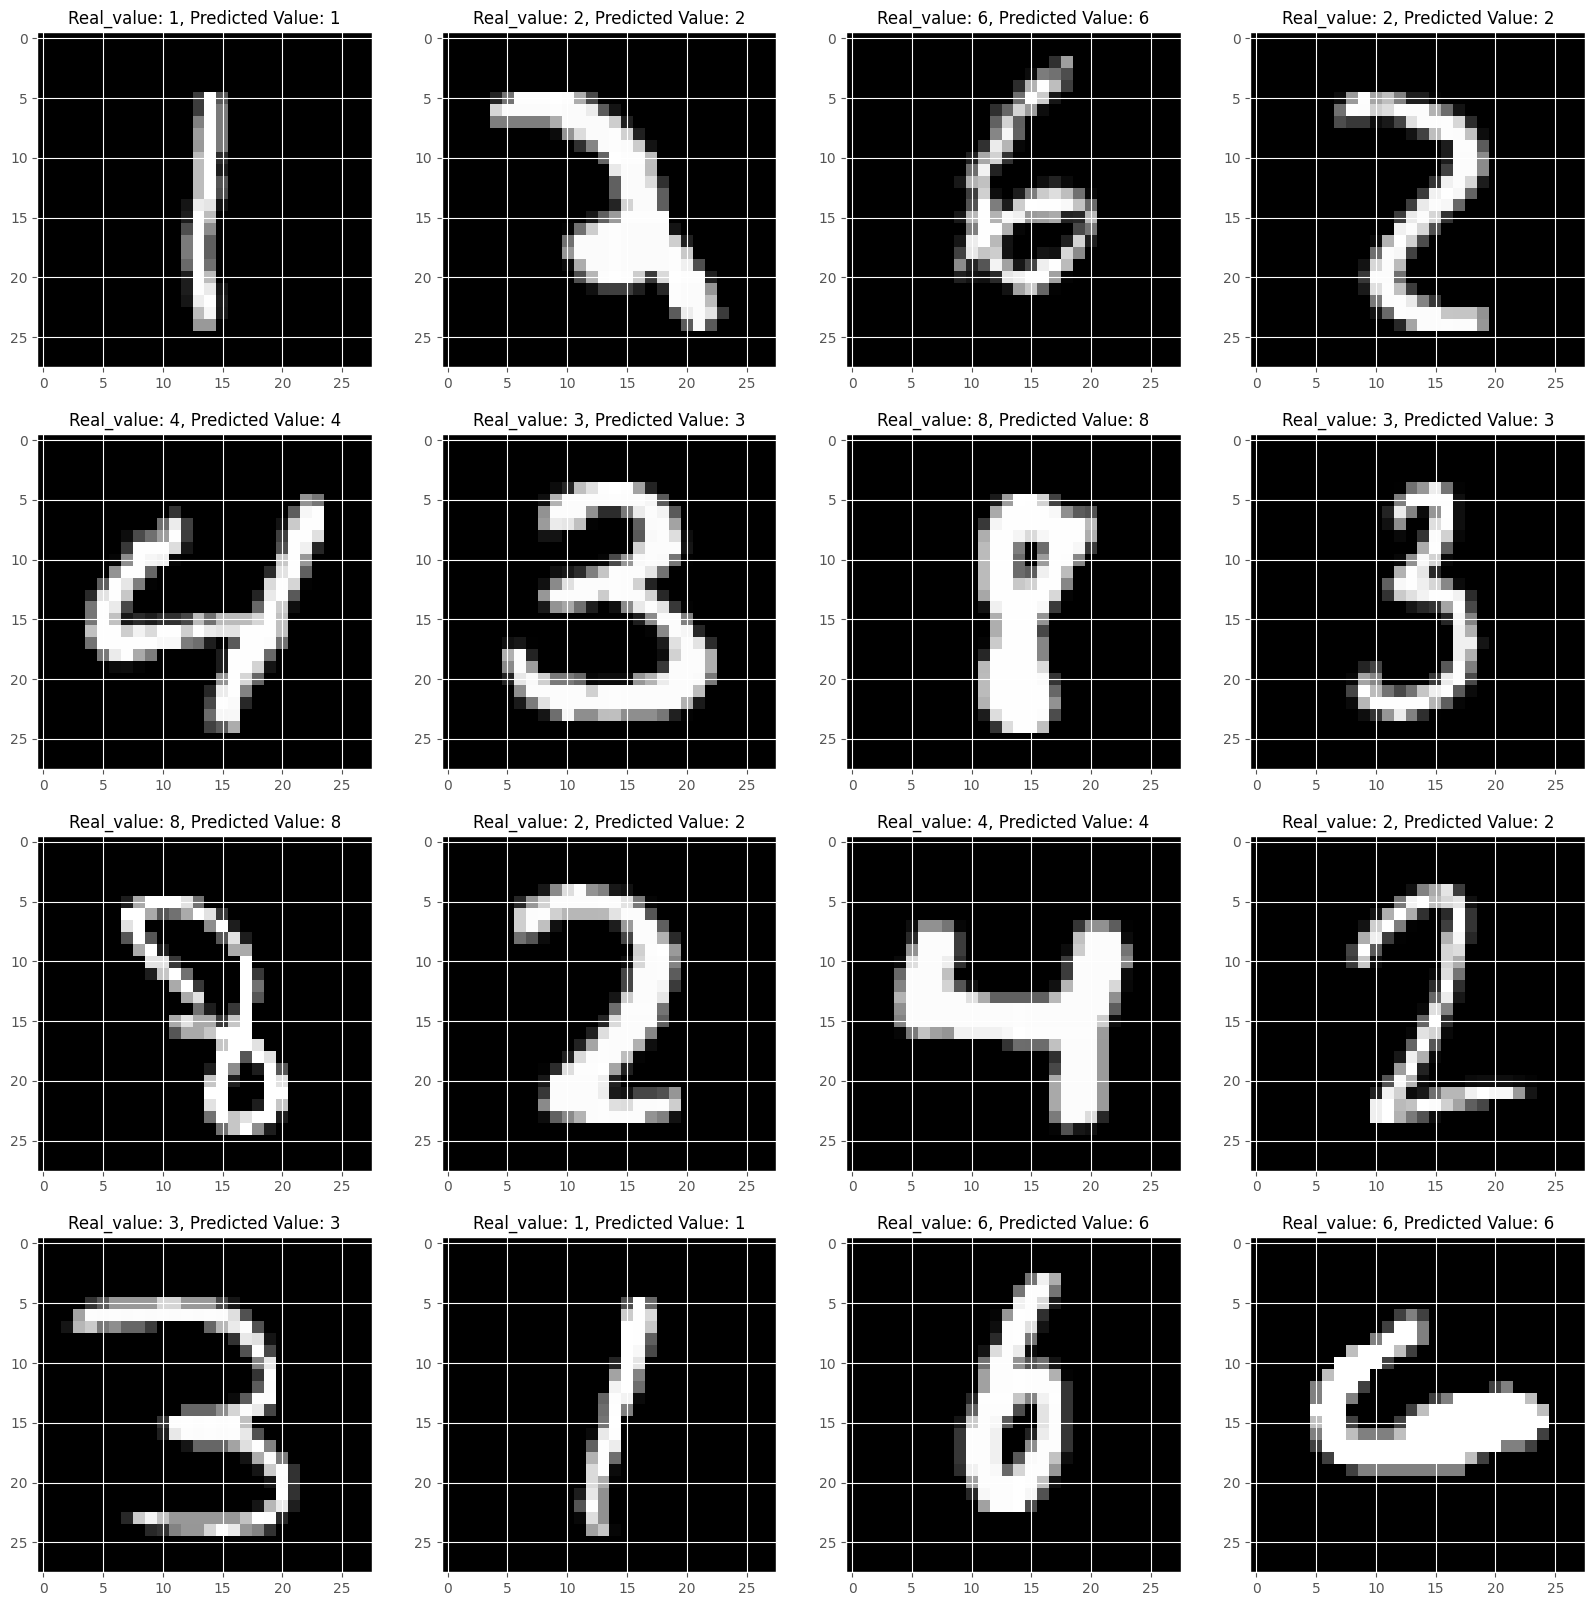

In [175]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
  for j in range(4):
    random_index = random.randint(0, 2115)
    sample = test_X[random_index]
    ax[i][j].imshow(sample, cmap="gray")
    ax[i][j].set_title(f"Real_value: {reverse_onehot(test_y[random_index])}, Predicted Value: {reverse_onehot(pred[random_index])}", fontsize=12)

